<a href="https://colab.research.google.com/github/tvan04/popularity-predictor/blob/main/Copy_of_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The following code uploaded the Spotify pop music dataset to the project.
# To prevent the code for asking for a new file each time it is run, this code has been disabled.

from google.colab import files
uploading = files.upload()

Saving pop_music_data.csv to pop_music_data (1).csv


**Understanding the Dataset & Purpose**

In [ ]:
# The dataset used in this project, pop_music_data.csv, is a collection of different popular pop songs from the past few years and information on each of them. 
# Using this dataset, we look to understand what characteristics about a song make it more popular than those that do not receive as much attention. 
      # NOTE: For now, our study stricly pertains to the song and its characteristics, not the fame of the artist who created the music (which would normally be a large factor
      # in the popularity of a song). 

# COLUMNS IN DATASET:

# #1: ARTIST NAME - Name of the artist or band who made the song (*string*)
# #2: TRACK NAME - Name of the song (*string*)
# #3: POPULARITY - Popularity rating from Spotify; 0 least popular, 100 most popular (*numeric, integer*)
# #4: GENRES - Generes that the song falls under (*list*)
# #5: PLAYLIST - Gives the name of the playlist that the song is a part of (*string*)
# #6: DANCEABLITY - Measures how 'suitable a track is for dancing' based on elements such as the beat characteristics; 0.0 is least dancable and 1.0, most danceable (*numeric, float*)
# #7: ENERGY - Describes the intensity of a track on a scale of 0.0 (least energy) to 1.0 (most energy) (*numeric, float*) 
# #8: KEY - Average key of the song; uses what is called the Pitch Class Notation and is described as a number  (*numeric, float*)
# #9: LOUDNESS - Average loudness of the song in decibels (db); typically between -60 and 0 db (*numeric, float*)
# #10: MODE -  Indicates the type of scale the melody of the track; major is represented by 1 and minor is represented by 0 (*numeric, integer*)
# #11: SPEECHINESS - Detects the amount of speaking in a song; 0.0 is not as much speech, 1.0 is more speech (*numeric, float*)
# #12: ACOUSTICNESS - Spotify feature that idicates how acoustic a song is; 0.0 is less acoustic, 1.0 is most acoustic (*numeric, float*)
# #13: INSTRUMENTALNESS - Represents how often an instrument is used in a track; 0 is least instrumental (*numeric, float*)  
# #14: LIVENESS - Spotify feature that calculates the probablity that the track was performed live (if there was an audience); 0.0 to 1.0 (*numeric, float*)
# #15: VALENCE - Spotify feature that measures the positiveness of the song; the higher the valence, the more positive (*numeric, float*)
# #16: TEMPO - Spofity feature that gives the average tempo of the song in beats per minute (BPM) (*numeric, float*)
# #17: ID - A mix of numbers and letters that is unique to each song in the dataset (*string*)
# #18: URI - The uniqe Spofity ID for each song (*string*)
# #19: TRACK_HREF - The link (href) to the track (*string*) 
# #20: ANALYSIS_URL - Link (href) to Spotify's analysis of the song (*string*)
# #21: DURATION_MS - Duration of the song in milliseconds (ms) (*numeric, integer*)
# #22: TIME_SIGNATURE - Average time signature (beats in each bar) of the song (*numeric, integer*)



,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,A Wilder Heart - Acoustic,40,0.440,0.339,0,-8.191,1,0.0381,0.6720,0.000000,0.0933,0.353,110.063,241562,5
1,Diamonds - Acoustic,59,0.489,0.284,10,-8.699,0,0.0508,0.8410,0.000000,0.1370,0.335,186.337,194542,4
2,Let Go,35,0.581,0.833,3,-6.509,1,0.0547,0.1140,0.000039,0.0748,0.557,170.039,207238,4
3,Weather,46,0.726,0.817,11,-6.397,0,0.0334,0.3990,0.178000,0.0871,0.501,126.977,222976,4
4,'פאוץ,49,0.795,0.658,7,-6.896,0,0.0570,0.2330,0.088300,0.2470,0.786,139.917,167108,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,wish i loved you in the 90s,66,0.435,0.481,1,-8.787,1,0.0327,0.8710,0.000000,0.1360,0.380,77.398,176853,4
3824,Gasoline,62,0.658,0.717,1,-4.257,0,0.0633,0.0846,0.002200,0.1200,0.595,133.074,193373,4
3825,Campus,68,0.639,0.704,7,-5.818,1,0.0659,0.2200,0.087200,0.0849,0.645,162.983,176467,4
3826,Mesunveret,28,0.603,0.323,5,-8.043,0,0.0322,0.8370,0.000069,0.1100,0.153,145.787,220283,4


**Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
 
popmusicupload = open('pop_music_data.csv', "r")    # Turns dataset into a pandas dataframe.
df = pd.read_csv('pop_music_data.csv')

### ***DATA PREPARATION*** ###
# print(df.isna().sum())                            # This code allowed us to see that there are no null values in the dataset.

df0 = df.copy()                                  

# FILTERING THROUGH INFORMATION  
df0 = df0.drop(['Artist Name', 'Genres', 'Playlist', 'id', 'uri', 'track_href', 'analysis_url'], axis = 1)
                                                    # Drops columns containing information that will not be used in our analysis of popularity. 

# DUPLICATES
# print(df0.duplicated())                           # Over 800 duplicates found and dropped.
df0 = df0.drop_duplicates()



   

<_io.TextIOWrapper name='pop_music_data.csv' mode='r' encoding='UTF-8'>


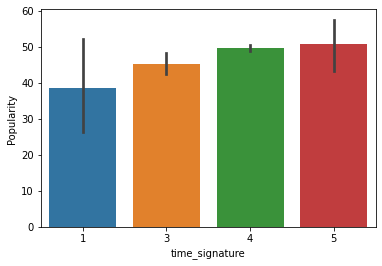

In [ ]:
#plot to see popularity based on time signature
timesigplot = sns.barplot(x='time_signature', y='Popularity', data=df0)

#plot to see popuarity based on 

In [ ]:
from pycaret import regression
regression_setup = regression.setup(data=df0, target='Popularity', train_size=.95)
regression.compare_models(exclude=['br'])
    #Random Forest Regressor(rf) was the model that was the best 
#rf = regression.create_model('rf')
#tuned_rf = regression.tune_model(rf, optimize='RMSE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16.7611,439.4341,20.9627,0.0429,0.7083,0.9893
1,15.7980,374.1643,19.3433,0.1306,0.4941,0.5590
2,15.8136,384.8714,19.6181,0.1067,0.6305,0.4309
3,16.0210,385.5458,19.6353,0.1446,0.5937,0.4453
4,15.9187,372.0225,19.2879,0.1380,0.4773,0.4068
5,16.0413,383.4119,19.5809,0.1122,0.6359,0.7153
6,15.4285,349.8533,18.7044,0.1703,0.5674,0.5443
7,16.0764,400.5096,20.0127,0.0214,0.8589,0.7824
8,14.7316,353.0342,18.7892,0.0726,0.6459,0.4492
9,14.4545,316.6287,17.7941,0.1516,0.5332,0.7457


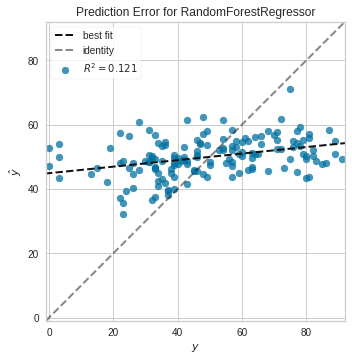

In [ ]:
#prediction error graph of tuned 
regression.plot_model(tuned_rf, plot='error')

# New Section

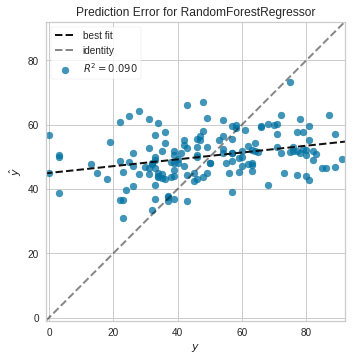

In [ ]:
#prediction error graph of untuned 
regression.plot_model(rf,plot='error')

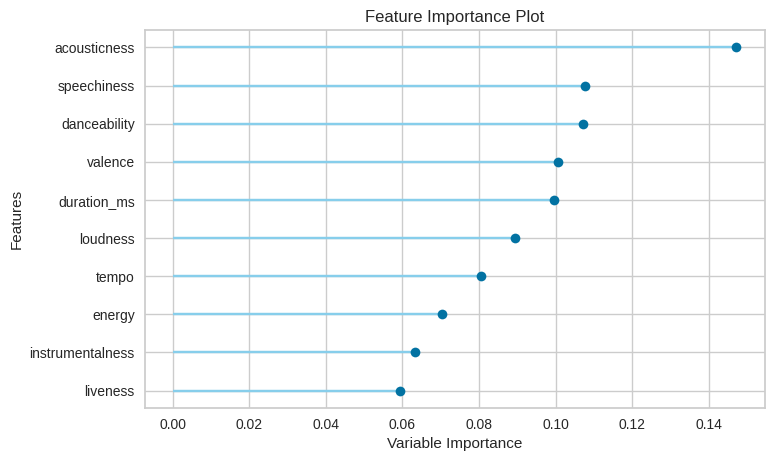

In [ ]:
#graph of each variable's importance on predicting popularity
regression.plot_model(tuned_rf,plot='feature')

In [ ]:
new_data = df0[df0['Track Name'] == 'Holy Water']
new_data2 = df0[df0['Track Name'] == 'Domino']
new_data3 = df0[df0['Track Name'] == 'Kiss Me More (feat. SZA)']
print(regression.predict_model(tuned_rf,new_data ))
print(regression.predict_model(tuned_rf,new_data2 ))
print(regression.predict_model(tuned_rf,new_data3 ))


      Track Name  Popularity  ...  time_signature      Label
2834  Holy Water          25  ...               4  39.119461

[1 rows x 16 columns]
    Track Name  Popularity  ...  time_signature      Label
586     Domino          50  ...               4  48.934632

[1 rows x 16 columns]
                   Track Name  Popularity  ...  time_signature      Label
384  Kiss Me More (feat. SZA)          98  ...               4  64.594539

[1 rows x 16 columns]


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000,3026.000000
mean,49.505948,0.639921,0.611490,5.226371,-7.017554,0.537013,0.075355,0.310490,0.028826,0.170345,0.525751,119.918009,206600.202578,3.955387
std,20.627675,0.138678,0.196462,3.591907,2.604878,0.498711,0.075062,0.292870,0.123882,0.124664,0.226134,27.292822,44384.899320,0.297081
min,0.000000,0.161000,0.074600,0.000000,-18.256000,0.000000,0.023200,0.000009,0.000000,0.015700,0.039700,50.827000,60693.000000,1.000000
25%,34.000000,0.551000,0.465250,2.000000,-8.489500,0.000000,0.034700,0.051825,0.000000,0.096200,0.347000,99.906250,178729.500000,4.000000
50%,48.000000,0.648000,0.630000,5.000000,-6.634000,1.000000,0.046000,0.216000,0.000002,0.120000,0.517000,118.091000,202583.000000,4.000000
75%,66.000000,0.739000,0.761000,8.000000,-5.162250,1.000000,0.079600,0.531000,0.000197,0.202000,0.701000,136.152000,228468.500000,4.000000
max,100.000000,0.980000,0.993000,11.000000,-0.882000,1.000000,0.701000,0.995000,0.985000,0.971000,0.984000,216.053000,811077.000000,5.000000
